<a href="https://colab.research.google.com/github/gabosantos/2324CS280UPD/blob/main/CS_280_Lesson_6_7_Model_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


In this lesson you will learn:
*   How to choose features based on their importance
*   How to find the best hyperparameters of an ML model

# Concepts

Optimizing your machine learning model is an important step in making sure that it can effectively capture the underlying patterns in your data. This can be achieved through various methods, with the most popular ones being feature selection and hyperparameter tuning.

## Feature Selection

The main goal of <font color="#9980FA">feature selection</font> is to identify the feature set that would optimize the machine learning model. Feature selection methods can be broadly categorized as: filter, wrapper, and embedded methods [Gupta].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1pXYeorOauLqKV1gb0-MK8qjPk1JOegAB" height="360"/></td></tr></table>
<center><small>Feature selection methods [Xie, et al.]</small></center>


### Filter Methods

<font color="#9980FA">Filter methods</font> focus on evaluating and selecting the most relevant features based on their statistical characteristics. These methods analyze each feature independently and assign a score to them, often considering metrics like correlation, information gain, or mutual information. Features with high scores are retained, while those with low scores are discarded.

Filter methods are computationally efficient and are typically applied as a preprocessing step to reduce the dimensionality of the dataset by eliminating irrelevant or redundant features [Gupta].


#### Information Gain

<font color="#9980FA">Information gain</font> calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable [Gupta].

<br>

\begin{equation}
Gain(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot H(S_v)
\end{equation}

\begin{equation}
H(S) = -\sum_{i=1}^c p(y_i) \log_2(p(y_i))
\end{equation}


Where:
- $Gain(S, A)$ is the information gain when splitting the dataset $S$ by attribute $A$.
- $H(S)$ is the entropy of the original dataset $S$.
- $\text{Values}(A)$ represents the possible values of attribute $A$.
- $S_v$ is the subset of data in $S$ for which attribute $A$ has the value $v$.
- $H(S_v)$ is the entropy of the subset $S_v$.


#### Chi-square Test

The <font color="#9980FA">Chi-square test</font> is used for categorical features in a dataset, specifically to measure the dependence between a  feature and a target variable. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores [Gupta].

Take note that chi-square test assumes the following:
- the variables have to be categorical
- sampled independently
- values should have an expected frequency greater than 5.

<br>
\begin{equation}
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
\end{equation}

Where:
- $\chi^2$ is the chi-square test statistic.
- $O_{ij}$ represents the observed frequency of a specific feature value and target value.
- $E_{ij}$ is the expected frequency for the same feature-target pairs.


#### Correlation Coefficient

<font color="#9980FA">Correlation</font> is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here [Gupta].

<br>

\begin{equation}
\rho_{X, Y} = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^n (Y_i - \bar{Y})^2}}
\end{equation}

Where:
- $\rho_{X, Y}$ is the Pearson correlation coefficient between variables $X$ and $Y$.
- $X_i$ and $Y_i$ represent the individual data points in the datasets $X$ and $Y$.
- $\bar{X}$ and $\bar{Y}$ are the means of datasets $X$ and $Y$, respectively.
- $n$ is the number of data points.




### Wrapper Methods

<font color="#9980FA">Wrapper methods</font> involve trying out different sets of features by training and testing a classifier for each set, evaluating how well each combination works to pick the best one. Unlike filter methods, which rely on statistical measures, wrapper methods directly assess the impact of feature subsets on model accuracy. This makes wrapper methods more computationally intensive, but would oftern result in better predictive accuracy than filter methods. [Gupta]


#### Forward Feature Selection


<font color="#9980FA">Forward feature selection</font> builds the machine learning model by iteratively adding one feature at a time, selecting the feature that provides the best model improvement at each step. This process continues until no further improvement is observed or until the preset criterion is achieved [Gupta].

<br>

**Forward Feature Selection Algorithm**

1. Initialize an empty set for selected features: $S \gets \emptyset$

2. For $k$ in the range from 1 to $N$ (where $N$ is the desired number of selected features):

  - Select the feature $F_k$ that maximizes the performance when added to the current set:
  
  - Add the selected feature to the set of selected features: $S \gets S \cup \{F_k\}$

3. Return the final set of selected features: $S$


#### Backward Feature Elimination

<font color="#9980FA">Backward feature elimination</font> works exactly opposite to the Forward Feature Selection method. In backward elimination, we begin with all available features and iteratively remove the least significant ones, aiming to improve the model's performance and reduce dimensionality [Gupta].

It's worth emphasizing that forward and backward selection methods, also known as stepwise modeling in regression, are often criticized by statisticians. This criticism arises from concerns about issues like redundant predictors and biased model evaluations [Sribney].

### Embedded Methods

Finally we have <font color="#9980FA">embedded methods</font>, which are a mix between filter and wrapper methods. By integrating statistical techniques into model training, embedded methods can identify significant interactions of features, while maintaining reasonable computational costs [Gupta].

#### LASSO Regularization (L1)

As discussed previously, regularization helps prevent overfitting by penalizing large coefficients in a machine learning model. This penalty is applied to the coefficients that correspond to each predictor in linear models. <font color="#9980FA">Lasso or L1 regularization</font> has the unique ability to shrink some of these coefficients to zero, effectively removing those predictors from the model [Gupta].

Again, note that L1 regularization is particularly effective for feature selection because it can reduce feature weights down to zero, which is something that L2 regularization is incapable of.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1FX-k9-UdtcZrZ6zlEh_W2f8YNEYliS3J" height="360"/></td></tr></table>
<center><small>L2 (left) vs L1 (right) regularization [Ihler]</small></center>


#### Random Forest Importance

<font color="#9980FA">Random forests</font> has built-in feature selection capabilities.  The tree-based strategies used by random forests naturally rank how well they improve the purity of the node over all trees. Nodes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features [Gupta].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=14IlkhmvhiCoKrfZijmeFk-G2gILgQnKF" height="360"/></td></tr></table>
<center><small>Random Forest Feature Selection</small></center>


## Hyperparameter Tuning

Our goal in machine learning is to select a hypothesis that will optimally fit future examples. To make that precise we need to define <font color="#9980FA">future example</font> and <font color="#9980FA">optimal fit</font>.

<br>

First we need to assume that the future examples will be like the past. We call this the stationarity assumption, and this is important because it allows us to assume that:

1. Each example in our data has the same prior probability distribution (which makes our model reliable)

2. And these samples are independent of the previous examples (which makes our data decomposable)

Examples that satisfy these equations are independent and <font color="#9980FA">identically distributed or i.i.d</font> [AIMA].

<br>

The next step is to define what optimal fit means. Essentially, the optimal fit is the hypothesis (or model) that minimizes the error rate. We've learned previously how we can use a test set to evaluate the model's performance [AIMA].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=11kGfbeyUVzcTmXmn-xh2Fkt-iD7eVD2T" height="360"/></td></tr></table>
<center><small>Machine Learning Life Cycle [Shanthababu]</small></center>

<br>

When training the model, we may end up creating multiple hypotheses: we might want to compare two completely different machine learning models, or we might want to adjust the various hyperparameters within a model. And for us to test these various model configurations during training—without touching the test set!—we need to use a separate <font color="#9980FA">validation set</font>. This could be a totally different set of data, or if we don't have enough data, we can use k-fold cross-validation to "recycle" the training and validation sets [AIMA].


The simplest approach to adjust model hyperparameters is by <font color="#9980FA">hand-tuning</font>: guess some parameter values based on past experience, train the model, measure its performance on the validation data, rinse and repeat. But a more systematic way of doing this is using search strategies [AIMA].


### Search Strategies

If there are only a few hyperparameters, each with a small number of possible values, then a <font color="#9980FA">grid search approach</font> is appropriate: try all combinations of values and see which performs best on the validation data.

Using this approach, you can try out various combinations simultaneously on separate machines. If you have enough computing power, it won't necessarily be slow. But, in most situations, choosing the best model might consume resources, even on massive clusters of a thousand computers, and so it can take several days [AIMA].

<br>

If there are too many combinations of possible values, then <font color="#9980FA">random search</font> samples uniformly from the set of all possible hyperparameter settings, repeating for as long as you are willing to spend the time and computational resources. Random sampling is also a good way to handle continuous values [AIMA].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=19sKCuRrPToztzpiA4HIIhenO_1fOXsNu" height="360"/></td></tr></table>
<center><small>Hyperparameter Tuning via Search Strategies [Warnes @ Medium]</small></center>

<br>

Lastly, when each training run takes a long time, it can be helpful to get useful information out of each one. <font color="#9980FA">Bayesian optimization</font> treats the task of choosing good hyperparameter values as a machine learning problem in itself [AIMA].



# Codes

## Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

# Load data
data = load_wine()

df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns= data['feature_names'] + ['target'])
df.head(5).style

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065.000000,0.000000
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050.000000,0.000000
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000,0.000000
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480.000000,0.000000
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000,0.000000


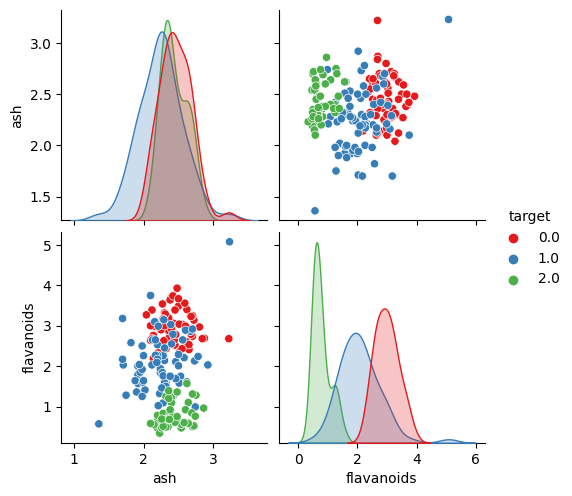

In [ ]:
# Visualize data
X = df[data['feature_names']]
y = df['target']

df_vis = pd.concat([X[['ash', 'flavanoids']], y], axis=1)

# Create a scatterplot matrix
sns.pairplot(df_vis, hue="target", palette="Set1")
plt.show()

## Filter feature selection

### Information gain

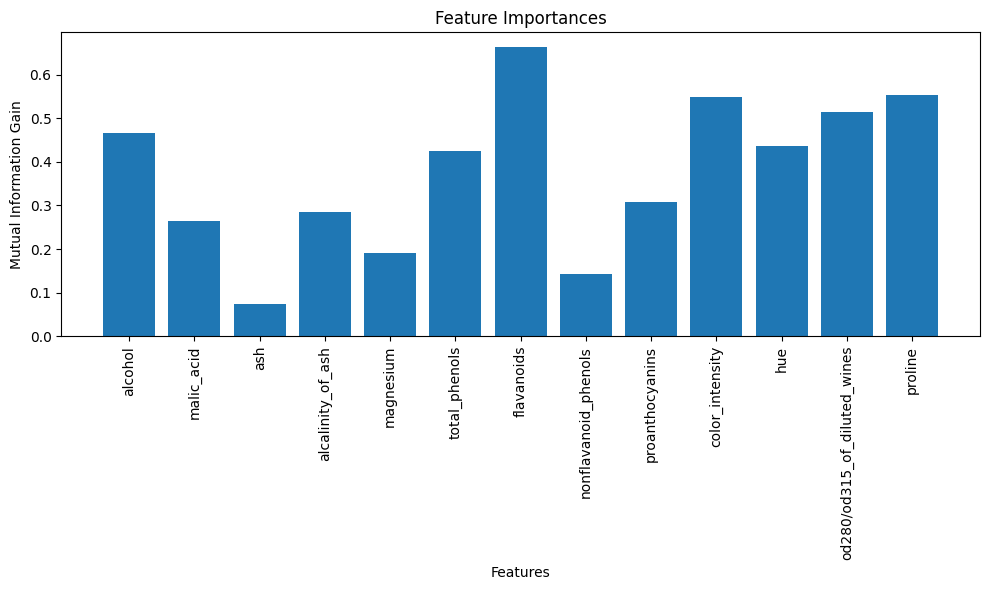

In [ ]:
from sklearn.feature_selection import mutual_info_classif

gain = mutual_info_classif(X, y)

plt.figure(figsize=(10, 6))
plt.bar(range(len(gain)), gain, tick_label=data['feature_names'])
plt.xlabel('Features')
plt.ylabel('Mutual Information Gain')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Chi-square test

Note: This is only for demo purposes. The features are not categorical!

Selected Features: ['flavanoids', 'color_intensity', 'proline']


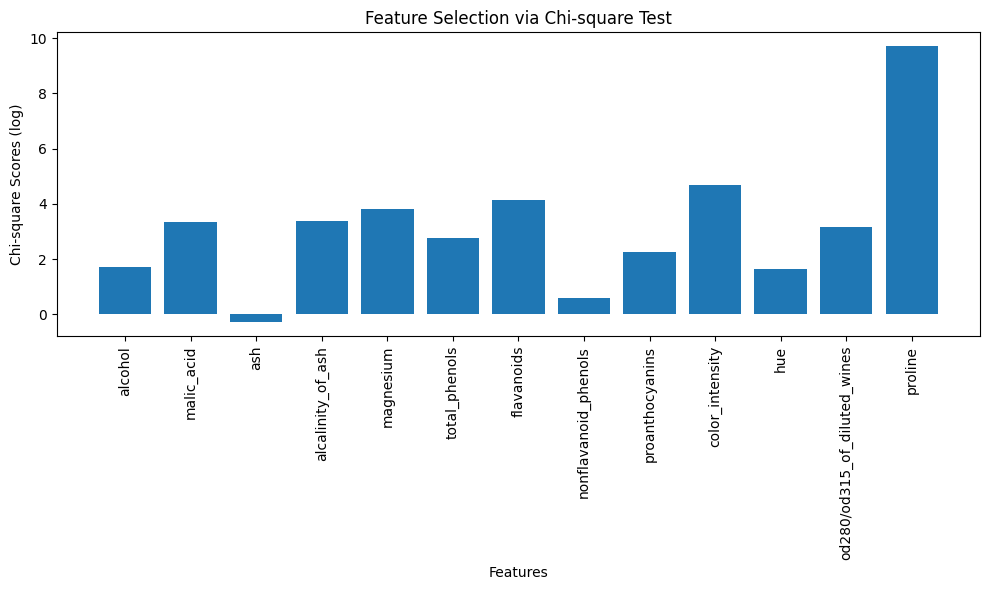

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Perform chi-square feature selection to select the best 3 features
k_best = SelectKBest(score_func=chi2, k=3)
X_new = k_best.fit_transform(X, y)

# Get the chi-square scores for the selected features
chi2_scores = k_best.scores_

# Print the selected features
selected_feature_indices = np.argsort(chi2_scores)[-3:]
selected_feature_names = [data.feature_names[i] for i in selected_feature_indices]
print("Selected Features:", selected_feature_names)

# Plot the features and their chi-square scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(chi2_scores)), np.log(chi2_scores), tick_label=data['feature_names'])
plt.xlabel('Features')
plt.ylabel('Chi-square Scores (log)')
plt.title('Feature Selection via Chi-square Test')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Correlation coefficient

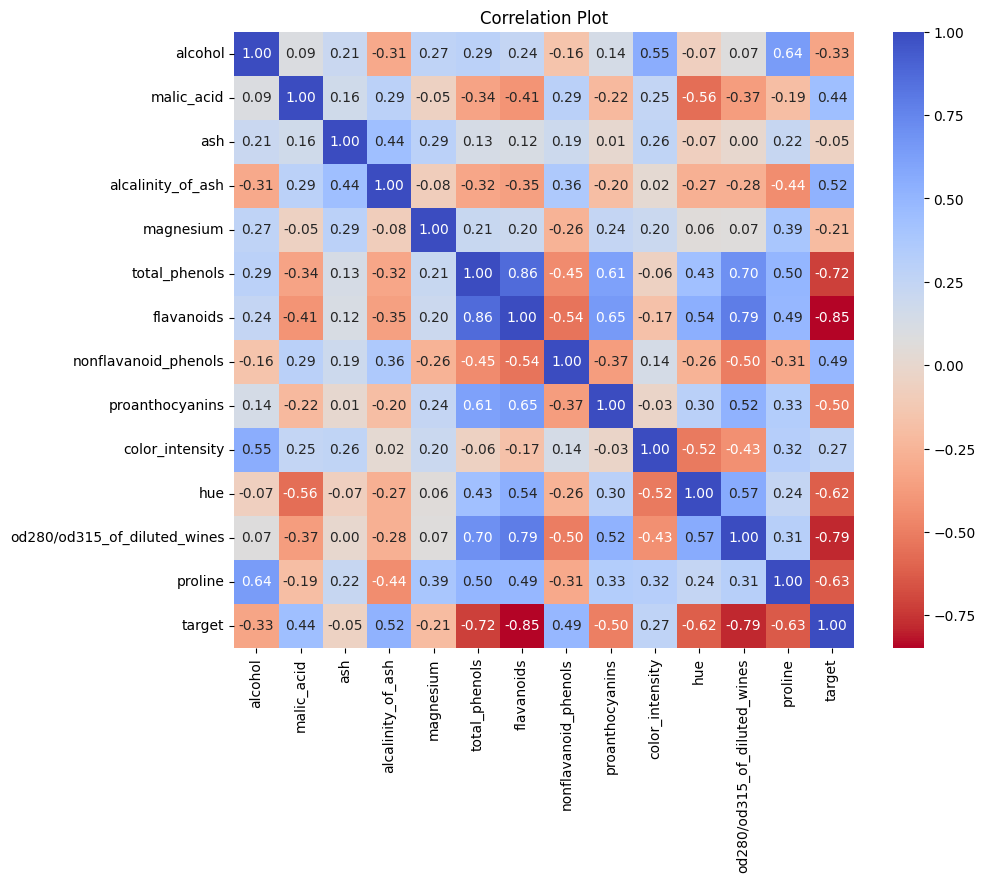

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title("Correlation Plot")
plt.show()

## Wrapper feature selection

### Forward feature selection

Selected features: ['flavanoids', 'hue', 'proline']


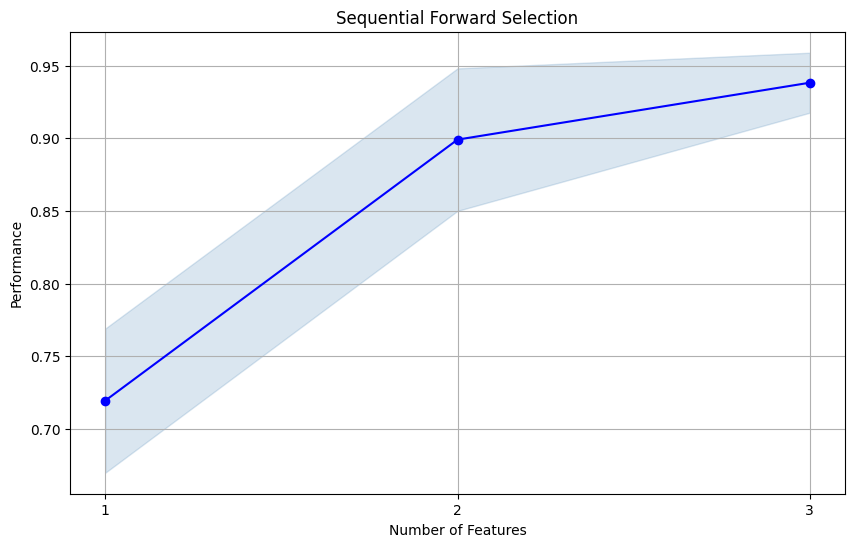

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Create a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=280)

# Perform forward feature selection
sfs = SFS(clf,
          k_features=3,  # Number of features to select
          forward=True,  # Forward selection
          floating=False,
          # verbose=2,
          scoring='accuracy',
          cv=3)
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = list(X.columns[list(selected_feature_indices)])
print("Selected features:", selected_feature_names)

# Plot the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(10, 6))
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

### Backward feature elimination

Selected features: ['magnesium', 'flavanoids', 'hue']


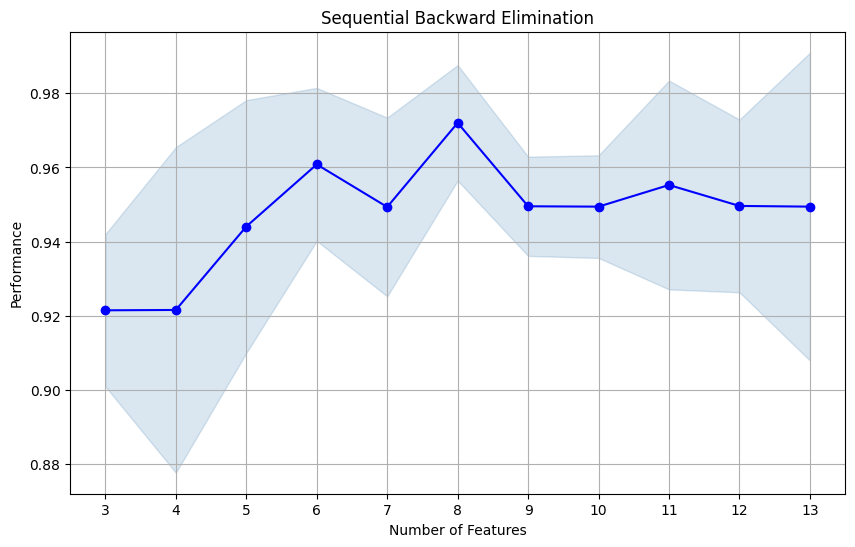

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Create a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=280)

# Perform forward feature selection
sfs = SFS(clf,
          k_features=3,  # Number of features to select
          forward=False, # Backward selection
          floating=False,
          # verbose=2,
          scoring='accuracy',
          cv=3)
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = list(X.columns[list(selected_feature_indices)])
print("Selected features:", selected_feature_names)

# Plot the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(10, 6))
plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()

## Embedded feature selection

### Lasso regularization

Selected features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


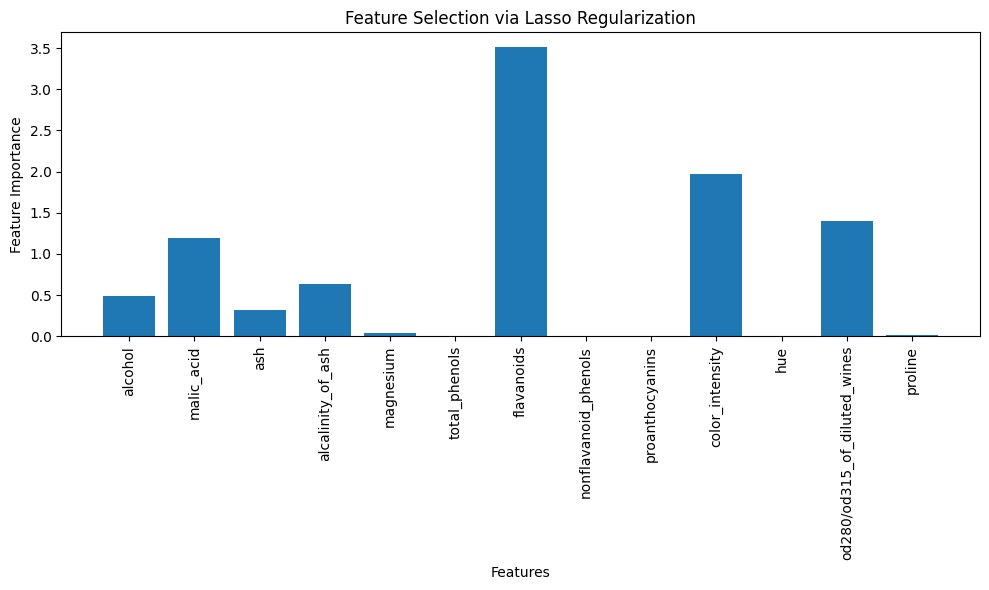

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Create model
model = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=280)
selector = SelectFromModel(model)
selector.fit(X, y)

scores = np.abs(np.min(selector.estimator_.coef_, axis=0))
selected_features = selector.get_support()
selected_feature_indices = np.nonzero(selected_features)[0]
selected_feature_names = list(X.columns[list(selected_feature_indices)])
print("Selected features:", selected_feature_names)

# Plot the features and their L1 weights
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, tick_label=data['feature_names'])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Selection via Lasso Regularization')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Random forest importance

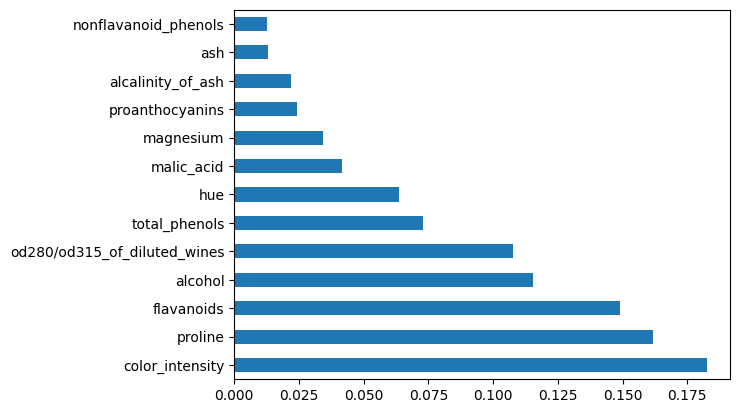

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

# Extract feature importance values
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh');

## Hyperparameter tuning

### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter space
n_estimators = [100, 150, 200]
max_features = [1, 2, 3, 4]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

print('Hyperparameter search space')
print(param_grid)

# Set the hyperparameter tuner
model = RandomForestClassifier()
tuner = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=10)
tuner.fit(X, y)
print('\nCross-validation via', tuner)

Hyperparameter search space
{'n_estimators': [100, 150, 200], 'max_features': [1, 2, 3, 4]}

Cross-validation via GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_features': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True)


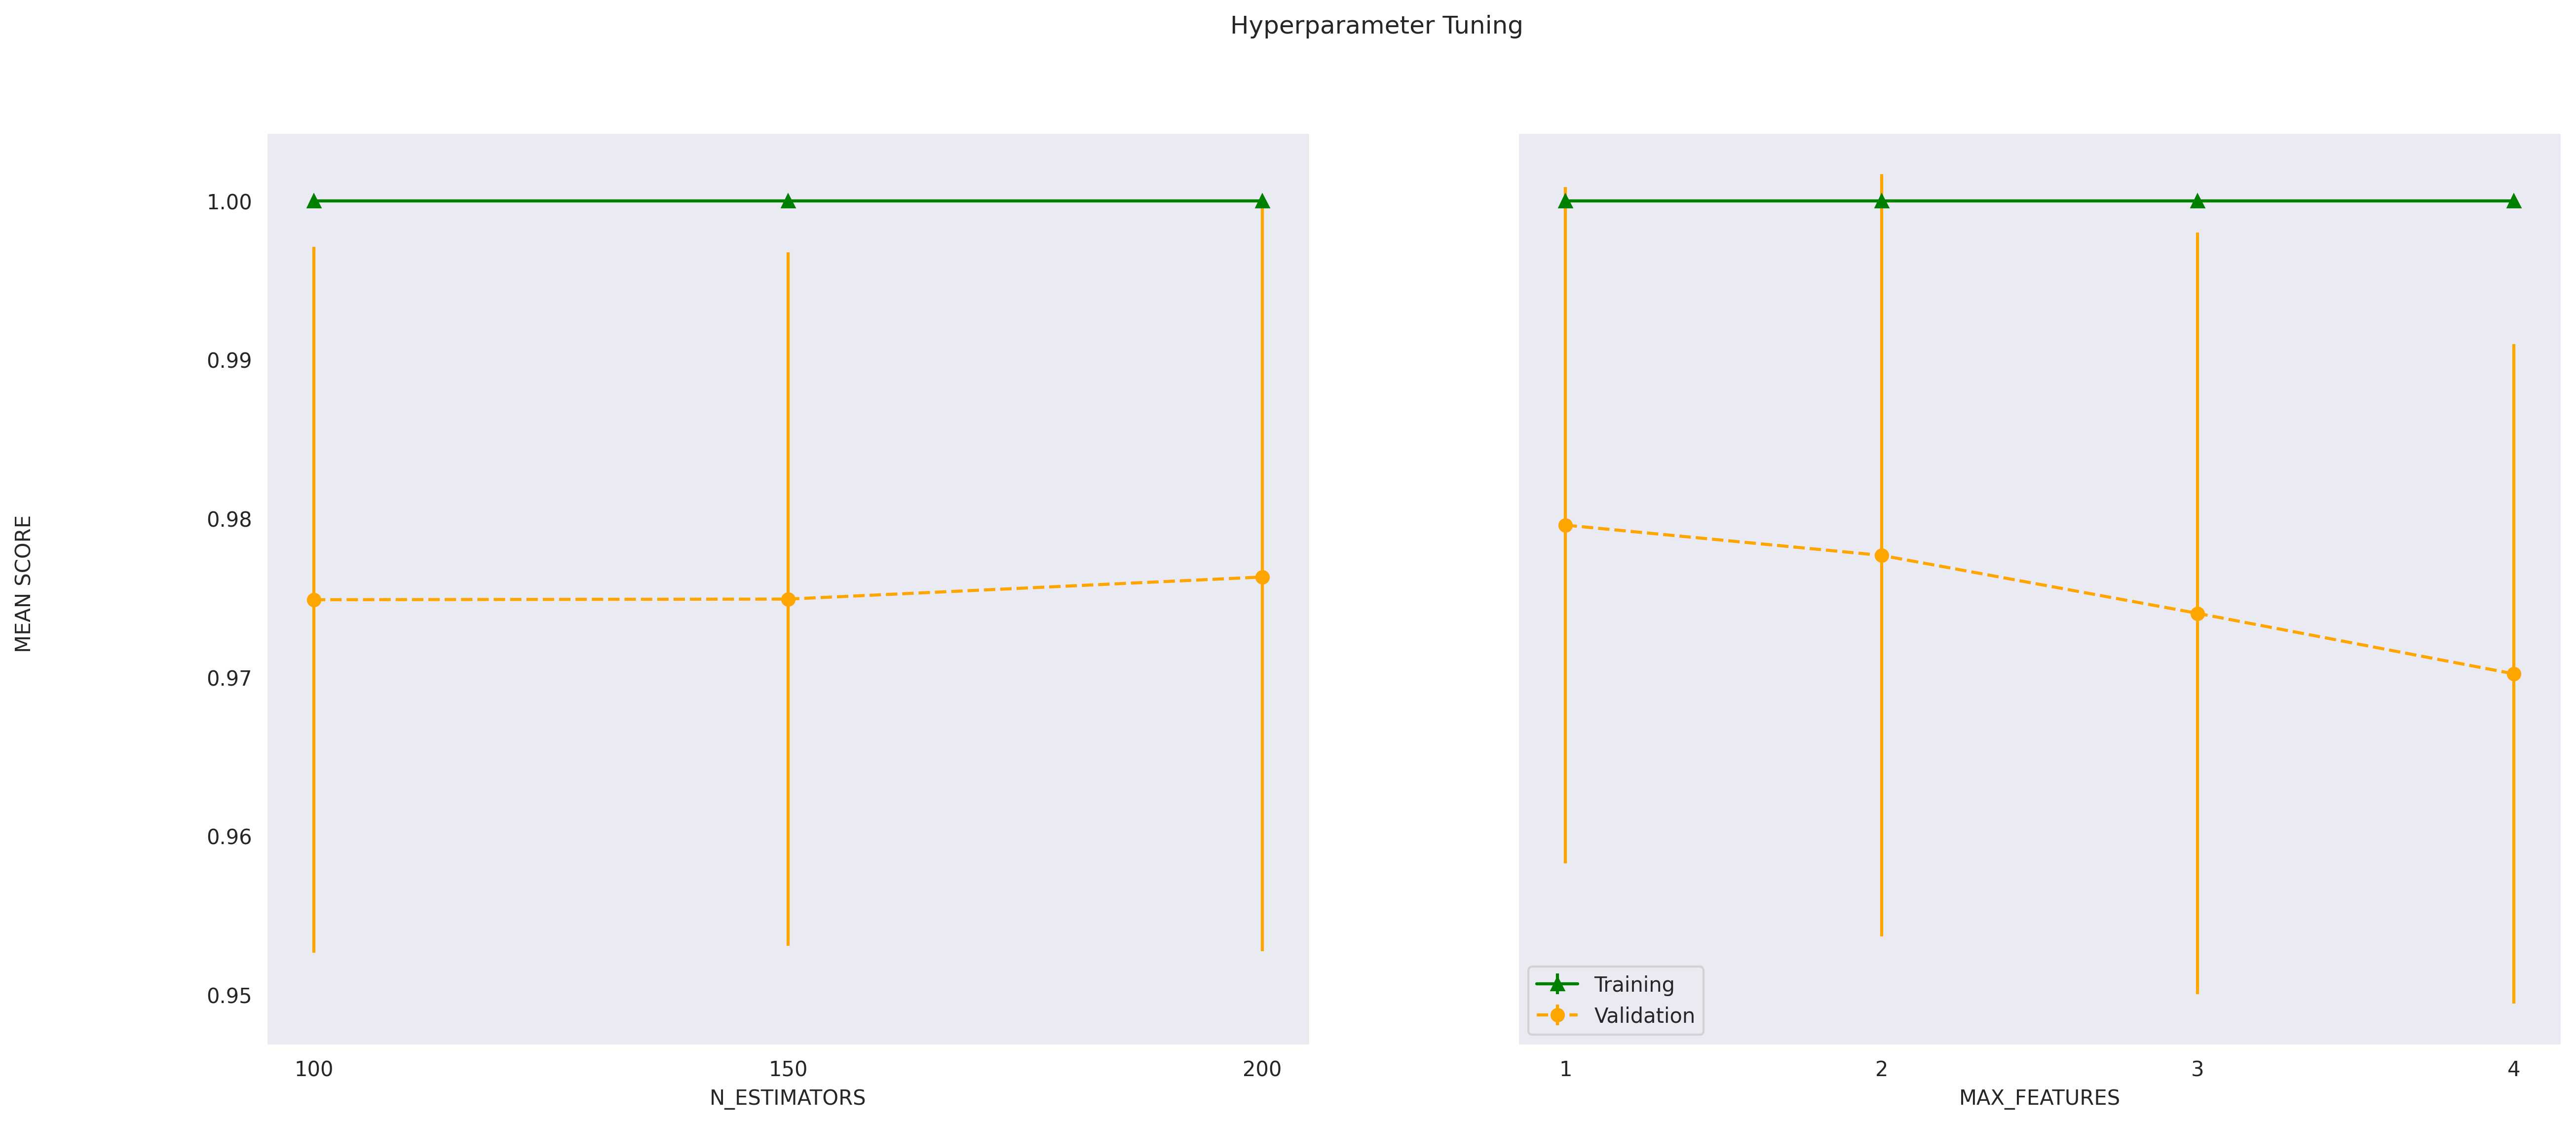

In [ ]:
# Plot hyperparam tuning results
def plot_cv(tuner):
  results = tuner.cv_results_
  cv_params = tuner.param_grid
  means_test = results['mean_test_score']
  stds_test = results['std_test_score']
  means_train = results['mean_train_score']
  stds_train = results['std_train_score']

  fig, ax = plt.subplots(1, len(cv_params), sharex='none', sharey='all', figsize=(20,8), dpi=300)
  fig.suptitle('Hyperparameter Tuning')
  fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')

  scores = {}
  for i, (param, param_val) in enumerate(cv_params.items()):
    x, y1, e1, y2, e2 = [], [], [], [], []

    for v in param_val:
      mask_idx = results['param_'+param]==v
      v = str(v)

      m_train = np.mean(means_train[mask_idx])
      s_train = np.sqrt(np.mean(stds_train[mask_idx]**2))
      m_test = np.mean(means_test[mask_idx])
      s_test = np.sqrt(np.mean(stds_test[mask_idx]**2))

      scores[param+'='+v+'_means_train'] = m_train
      scores[param+'='+v+'_stds_train'] = s_train
      scores[param+'='+v+'_means_test'] = m_test
      scores[param+'='+v+'_stds_test'] = s_test

      x.append(v)
      y1.append(m_train)
      e1.append(s_train)
      y2.append(m_test)
      e2.append(s_test)

    ax[i].errorbar(x, y1, e1, linestyle='-', marker='^', color='green', label='Training')
    ax[i].errorbar(x, y2, e2, linestyle='--', marker='o', color='orange', label='Validation')
    ax[i].set_xlabel(param.upper())

  plt.legend()
  plt.show()

sns.set_style('dark')
plot_cv(tuner)

# Challenges

# References

[AIMA] Russell and Norvig, *Artificial Intelligence: A Modern Approach*, 4th ed, 2020

[HML] Géron, *Hands-on Machine Learning with Scikit-Learn*, Keras, and TensorFlow, 2017

[PRML] Bishop, *Pattern Recognition and Machine Learning*, 2006

[Gupta] Gupta, [Feature Selection Techniques in Machine Learning](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/), 2023

[Sribney] Sribney, [What are some of the problems with stepwise regression?
](https://www.stata.com/support/faqs/statistics/stepwise-regression-problems/)